# Image Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.exposure import rescale_intensity

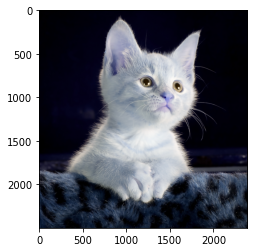

In [2]:
# load the img
img = cv2.imread('/content/cat.jpeg')
plt.imshow(img)
plt.show()

# Convert to Grayscale


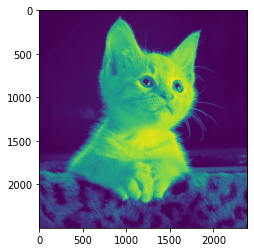

In [3]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2)
plt.show()

# Convolution

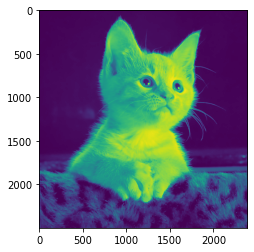

In [4]:
gaussian_blur_img = cv2.GaussianBlur(img2, (3,3), 0)
plt.imshow(gaussian_blur_img)
plt.show()

### Vertical Convolution

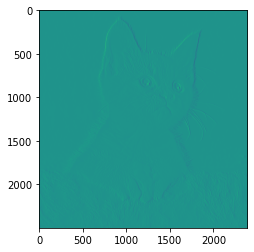

In [5]:
ver_conv_img = cv2.Sobel(src=gaussian_blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
plt.imshow(ver_conv_img)
plt.show()

### Horizontal Convolution

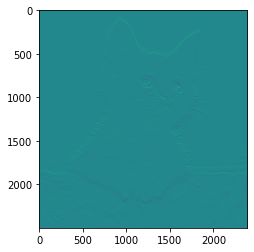

In [6]:
hori_conv_img = cv2.Sobel(src=gaussian_blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
plt.imshow(hori_conv_img)
plt.show()

In [7]:
# convolution function
def convolution(img, kernel):
    (i_height, i_width) = img.shape[:2]
    (k_height, k_width) = kernel.shape[:2]
    pad = (k_width-1) // 2
    img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((i_height, i_width), dtype='float64')
    for i in np.arange(pad, i_height+pad):
        for j in np.arange(pad, i_width+pad):
            reg_of_interest = img[i-pad:i + pad + 1, j-pad:j + pad + 1]
            convolute = (reg_of_interest * kernel).sum()

            output[i-pad, j-pad] = convolute
    output = rescale_intensity(output, in_range=(0,255))
    output = (output*255).astype("uint16")
    
    return output

In [8]:
# laplacian operator
laplace = np.array(([0,1,0], 
                       [1,-4,1], 
                       [0,1,0]), dtype='int')

In [9]:
b, g, r = cv2.split(img)
list = [b, g,r]
conv_list = []
for i in range(len(list)):
    conv_list.append(convolution(list[i], laplace))

### Super-Imposed Convolution

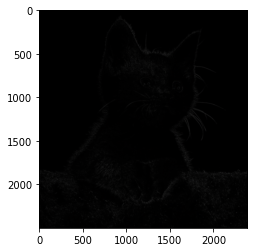

In [10]:
super_conv_img = cv2.merge((conv_list[0], conv_list[1], conv_list[2]))
plt.imshow(super_conv_img)
plt.show()